In [1]:
print("Prajwal Raj")

Prajwal Raj


In [2]:
print("ML Regression Technique")

ML Regression Technique


In [3]:
# You can get data on kaggle website

In [4]:
#Url for data is :https://www.kaggle.com/hugomathien/soccer

# Download the data and use

In [5]:
# you will get an database sql.lite

In [6]:
#Import the required libraries


import sqlite3 # to ingest data in to the jupyter notebook
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
# Get the data from the Database you have downloaded

# To do so First we need to connect to database
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [8]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Some Data Preprocessing and Data Analysis

In [9]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [10]:
r = df.columns.tolist()

In [11]:
len(r)

42

In [12]:
df.shape

(183978, 42)

In [13]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [15]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [17]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,...,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,...,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,...,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979


Since the data if too big and there are too many missing values in it , so its quite heavy to go through each feature (since there are many), we go dropna()

In [18]:
df.dropna()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [27]:
df.iloc[40]

id                                      41
player_fifa_api_id                  186170
player_api_id                       162549
date                   2015-09-21 00:00:00
overall_rating                          66
potential                               70
preferred_foot                       right
attacking_work_rate                 medium
defensive_work_rate                 medium
crossing                                64
finishing                               58
heading_accuracy                        60
short_passing                           66
volleys                                 52
dribbling                               66
curve                                   67
free_kick_accuracy                      63
long_passing                            62
ball_control                            67
acceleration                            78
sprint_speed                            75
agility                                 85
reactions                               51
balance    

In [19]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [20]:
df= df.dropna()

In [21]:
df.shape

(180354, 42)

In [22]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking       

In [23]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.007928,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.163099,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.188087,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267


In [24]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [25]:
target = ['overall_rating']

In [26]:
x = df[features]
y = df[target]

In [28]:
x.iloc[9]

potential             75.0
crossing              79.0
finishing             51.0
heading_accuracy      57.0
short_passing         70.0
volleys               29.0
dribbling             71.0
curve                 68.0
free_kick_accuracy    69.0
long_passing          68.0
ball_control          70.0
acceleration          79.0
sprint_speed          78.0
agility               78.0
reactions             67.0
balance               90.0
shot_power            71.0
jumping               84.0
stamina               79.0
strength              56.0
long_shots            58.0
aggression            67.0
interceptions         66.0
positioning           58.0
vision                65.0
penalties             59.0
marking               76.0
standing_tackle       75.0
sliding_tackle        78.0
gk_diving             14.0
gk_handling            7.0
gk_kicking             9.0
gk_positioning         9.0
gk_reflexes           12.0
Name: 9, dtype: float64

In [29]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
...,...
183973,83.0
183974,78.0
183975,77.0
183976,78.0


In [30]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [31]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
p = reg.predict(x_test)


In [75]:
p[0]

array([73.08829436])

In [76]:
p

array([[73.08829436],
       [68.89938701],
       [66.98906587],
       ...,
       [68.2430775 ],
       [74.58505829],
       [74.54300667]])

In [77]:
y_test

,overall_rating
168247,76.0
175933,72.0
178229,67.0
106479,68.0
161191,74.0
...,...
169727,82.0
148409,69.0
110049,68.0
139103,75.0


In [37]:
#Get accuracy of the model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(p,y_test)

In [38]:
mse

7.772515382462813

In [54]:
# To get RootMeanSquaredError

from math import sqrt

rmse = sqrt(mse)

In [55]:
rmse

2.7879231306588803

## Trying with a new Regression Algorithm : - DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dr = DecisionTreeRegressor(max_depth = 20)
dr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [62]:
p1 = dr.predict(x_test)

In [63]:
p

array([76.  , 72.  , 67.76, ..., 68.  , 75.  , 74.  ])

In [64]:
y_test

,overall_rating
168247,76.0
175933,72.0
178229,67.0
106479,68.0
161191,74.0
...,...
169727,82.0
148409,69.0
110049,68.0
139103,75.0


In [65]:
dmse = mean_squared_error(p1,y_test)

In [66]:
dmse

2.040208681809994

In [67]:
# Calculate rmse
rmse2 = sqrt(dmse)

rmse2

In [68]:
rmse2

1.4283587370860285

In [69]:
# Now Compare both the rmse 
print(rmse)
print("")
print(rmse2)

2.7879231306588803

1.4283587370860285


 So it is clear that DecisionTreeRegressor do well then LinearRegressor in predicting the correct values

Now let us Draw the distplot for both the predicted outcome

In [70]:
import seaborn as sns

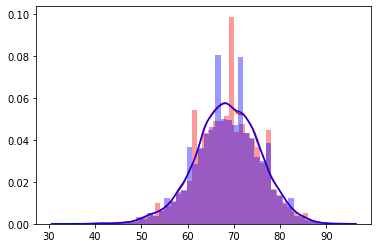

In [71]:
# This is the graph with histogram included in it

ax1 = sns.distplot(y_test, color = 'r', label = 'Ground Truth')
sns.distplot(p1, color= 'b',  label ='DTR_Prediction' )

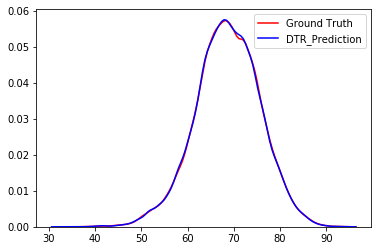

In [72]:
# Draw the same graph excluding histogram 
ax1 = sns.distplot(y_test, color = 'r', hist = False, label = 'Ground Truth')
sns.distplot(p1, color= 'b',hist = False,  label ='DTR_Prediction' )

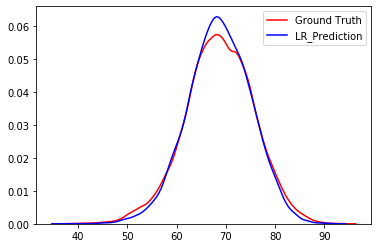

In [78]:
# Now Draw the same graph with the predicted value by the LinearRegressor

ax1 = sns.distplot(y_test, color = 'r', hist = False, label = 'Ground Truth')
sns.distplot(p, color= 'b',hist = False,  label ='LR_Prediction' )